### 목표
- 타이타닉 데이터를 학습해서 생존자/사망자 예측해보자
- 머신러닝 전체 과정 정리해보자

#### 머신러닝 과정
- 문제 정의
- 데이터 수집(크롤링, DB에서 값 가져오기, ...)
- 데이터 전처리
- 탐색적 데이터 분석 (EDA)
- 모델 선택 및 하이퍼 파라미터 조정
- 학습하기
- 모델 평가


### 1. 문제 정의
- 생존자 / 사망자를 예측
- kaggle 경진대회에서 높은 순위를 차지
- 머신러닝 전체 과정을 체험해보는 예제

### 2. 데이터 수집
- kaggle 사이트로부터 데이터 수집

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #시각화 라이브러리

#### Question1
- 타이타닉 데이터를 업로드 후, train, test 변수에 데이터를 답아주세요.
(인덱스는 PassengerId로 사용할것)

In [2]:
train = pd.read_csv('data/train.csv', index_col = 'PassengerId')
train2 = pd.read_csv('data/train.csv', index_col = 'PassengerId')
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
test = pd.read_csv('data/test.csv', index_col = 'PassengerId')
test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test.drop('Survived', axis=1, inplace = True)

In [5]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


### 3. 데이터 전처리
- 결측치 확인

In [6]:
train.info()
# train 결측치 컬럼 -> Age, Cabin, Embarked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
test.info()
# train 결측치 컬럼 -> Age, Fare, Cabin

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


#### Embarked(승선항) 결측치 채우기
- Embarked 안에 있는 S C Q 값의 빈도를 확인하고, 가장 높은 빈도수의 값으로 결측치를 채워주자

In [8]:
train['Embarked'].value_counts() #시리즈 형태에서 적용가능한 함수

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [10]:
train['Embarked'] = train['Embarked'].fillna('S') #결측치를 'S'로 채워준다.

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### Age 컬럼 결측치 채우기
- 단순 기술 통계치로 채우지 않고 다른 컬럼과의 상관 관계를 이용해서 결측치를 채워보자
- Age와 다른 컬럼간의 상관관계를 알아보자

In [12]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Pclass와 상관관계가 가장 높다
- 여자와 남자의 나이 평균 다를것이므로 Sex컬럼이랑 같이 그룹핑해서 Age 컬럼을 채워보자

In [13]:
pt = train.pivot_table(values = 'Age',
                 index = 'Pclass',
                 columns = 'Sex',
                 aggfunc = 'mean')

pt

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


# Pclass가 1이고, Sex가 'female'인 값 인덱싱

In [14]:
pt.loc[1,'female']

34.61176470588235

# Pclass가 3이고, Sex가 'male'인 값 인덱싱

In [15]:
pt.loc[3,'male']

26.507588932806325

In [16]:
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [17]:
def fill_age(row):
    #만약에 나이에 결측치가 있다면 pt에서 값을 가져와 채운다.
    if np.isnan(row['Age']):
        return pt.loc[row['Pclass'],row['Sex']]
    #없다면 원래 데이터의 나이로 채운다.
    else:
        return row['Age']

In [18]:
train['Age'] = train.apply(fill_age, axis = 1).astype('int64')
train['Age']

PassengerId
1      22
2      38
3      26
4      35
5      35
       ..
887    27
888    19
889    21
890    26
891    32
Name: Age, Length: 891, dtype: int64

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [20]:
# test 'Age'컬럼에도 결측치를 채워보자
test['Age'] = test.apply(fill_age, axis = 1).astype('int64')
test['Age']

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


#### Fare 결측치 채우기
- Fare와 상관관계가 높은 컬럼은 뭘까요?
- 상관관계가 높은 컬럼과 Sex('범주형')을 그룹핑해서 결측치를 채워보자

In [21]:
train.corr() #상관관계 보기

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


In [22]:
# 인덱스에는 Pclass, 컬럼은 Sex의 기준으로 Fare 요금의 값(평균)을 표현해보자

pt2 = train.pivot_table(values = 'Fare',
                 index = 'Pclass',
                 columns = 'Sex',
                 aggfunc = 'mean')
pt2

Sex,female,male
Pclass,,
1,106.125798,67.226127
2,21.970121,19.741782
3,16.118810,12.661633


In [23]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [24]:
#test['Fare'] 결측치가 있으면 fillna()이용해서 결측치 채워줌, 소숫점 4자리까지
test['Fare'] = test['Fare'].fillna(12.6616)

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Cabin 결측치 채우기

In [26]:
train['Cabin']

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

In [27]:
train['Cabin'].unique() #중복제거

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [28]:
#'M'으로 결측치 채워보세요
#Cabin 컬럼의 데이터를 훼속하지 않고, 
#새로운 Deck컬럼을 추가해서 값 저장
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

In [29]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,M
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,C85
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,M
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,C123
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,M


In [30]:
# 선실에 대한 정보를 숫자를 제외하고 문자값으로만 저장
train['Deck'] = train['Deck'].str[0] #인덱스 값 0번째인 문자열 가져오기
test['Deck'] = test['Deck'].str[0]

In [31]:
train['Deck']
test['Deck']

PassengerId
892     M
893     M
894     M
895     M
896     M
       ..
1305    M
1306    C
1307    M
1308    M
1309    M
Name: Deck, Length: 418, dtype: object

In [32]:
# Cabin컬럼 필요없음, drop하기
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### 4. 데이터 탐색 EDA
- train 데이터를 이용해서 탐색
- test 데이터를 탐색하는 것은 모델의 일반화에 도움이 되지 않음.

#### 범주형 데이터 탐색

#### Deck 시각화
- 선실번호 정보와 Survived, Name(사람의 수) 연결하여 생존/사망 수 시각화 해보기

In [35]:
train[['Deck', 'Survived', 'Name']].groupby(['Deck','Survived']).count()

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

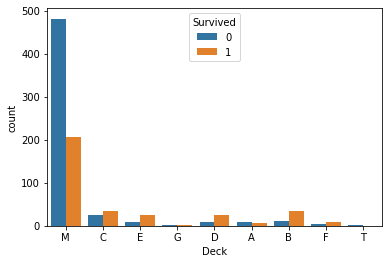

In [36]:
sns. countplot(data = train, x = 'Deck', hue = 'Survived') #카운트해서 플롯을 그려준다.

- M 에서 상대적으로 사람이 많이 죽었다.
- M 이라는 값으로 생존여부를 판단해볼 수 있지 않을까?

#### Pclass 시각화

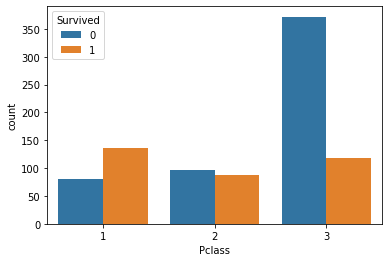

In [37]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

- Pclass의 3등급 사람이 많이 죽었다.

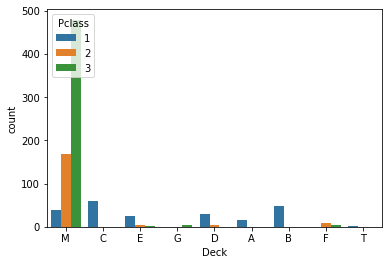

In [38]:
sns.countplot(data = train, x= 'Deck', hue = 'Pclass')

- Pclass 특성 하나만 사용해도 충분하겠다

#### Question2
- Sex
- Embarked

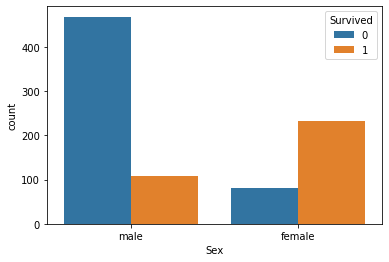

In [39]:
# 성별에 따른 생존/사망 수치 시각화
sns. countplot(data = train, x = 'Sex', hue = 'Survived') #카운트해서 플롯을 그려준다.

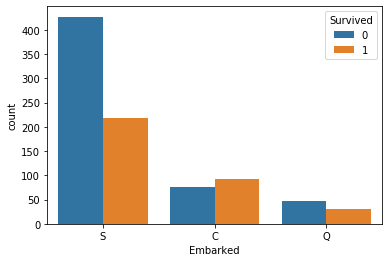

In [40]:
# 승선항 따른 생존/사망 수치 시각화
sns. countplot(data = train, x = 'Embarked', hue = 'Survived') #카운트해서 플롯을 그려준다.

### 수치형 데이터 시각화

#### Age 시각화
- 성별별 나이에 따른 사망/생존 분포 확인
- violinplot = boxplot + kdeplot(데이터의 분포를 볼 수 있는 그래프)

(0, 80)

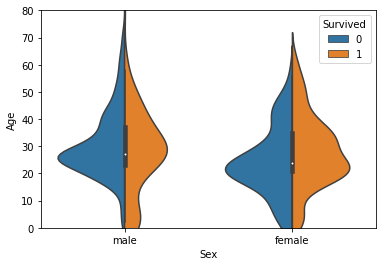

In [41]:
sns.violinplot(data = train,
              x = 'Sex',
              y = 'Age',
              hue = 'Survived',
              split = True) #반반 합치기

plt.ylim(0,80) #y축 0~80까지 보기

- 20~40대 사이가 대체적으로 분포가 넓게 나타남
- 0~10세의 어린아이들의 경우 남자 아이가 조금 더 많이 살아남았다

#### Fare 시각화
- 성별별 요금에 따른 사망/생존 분포 확인

(0, 300)

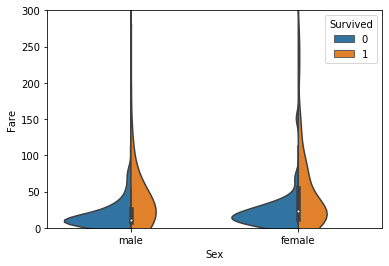

In [42]:
sns.violinplot(data = train,
              x = 'Sex',
              y = 'Fare',
              hue = 'Survived',
              split = True) #반반 합치기

plt.ylim(0,300)

In [43]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,M
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,M
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,C
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,M
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,M
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,S,M


### SibSp,Parch - 형제 배우자, 부모자식 

In [44]:
train['FamilySize'] = train['SibSp']+train['Parch']+1
test['FamilySize'] = test['SibSp']+test['Parch']+1

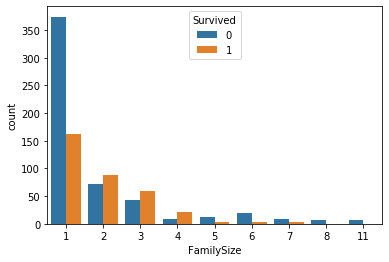

In [45]:
sns.countplot(data = train, x='FamilySize', hue = 'Survived')

- 1일때는 죽은 사망자 비율이 높고, 2~4 생존 비율이 높고, 5부터는 사망 비율이 높다.

- bining (숫자형 변수 -> 범주형 변수) : 사소한 관찰의 오류 줄일 수 있다.

In [46]:
bins = [0,1,4,11] #구간 나누기 
labels = ['Alone', 'Small', 'Large'] #구간에 이름 붙여주기
train['FamilyGroup'] = pd.cut(train['FamilySize'], bins = bins, labels = labels)
test['FamilyGroup'] = pd.cut(test['FamilySize'], bins = bins, labels = labels)

In [47]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,FamilySize,FamilyGroup
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,M,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,2,Small
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,M,1,Alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,C,2,Small
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,M,1,Alone


In [48]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,FamilySize,FamilyGroup
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,M,1,Alone
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,M,2,Small
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,M,1,Alone
895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,M,1,Alone
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,M,3,Small


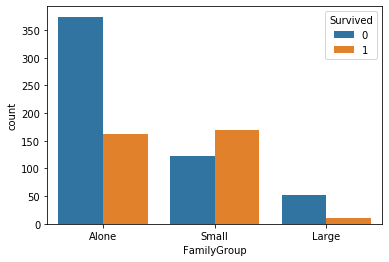

In [49]:
sns.countplot(data = train, x = 'FamilyGroup', hue = 'Survived')

#### Text 데이터 다루기 

#### Name 시각화
- 중간 호칭만 추출해보자

#성진이형이 보내준거
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

In [50]:
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [51]:
#1. 승객 아이디가 1인 사람의 'Name'
#2. split()함수 이용해서 ','을 기준으로 분리

train.loc[1,'Name'].split(', ')[1].split('.')[0]

'Mr'

In [52]:
def split_name(row):
    return row.split(', ')[1].split('.')[0]

In [53]:
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

In [54]:
train['Title'] = train['Name'].apply(split_name)
test['Title'] = test['Name'].apply(split_name)

In [55]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,FamilySize,FamilyGroup,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,M,2,Small,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,2,Small,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,M,1,Alone,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,C,2,Small,Mrs
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,M,1,Alone,Mr


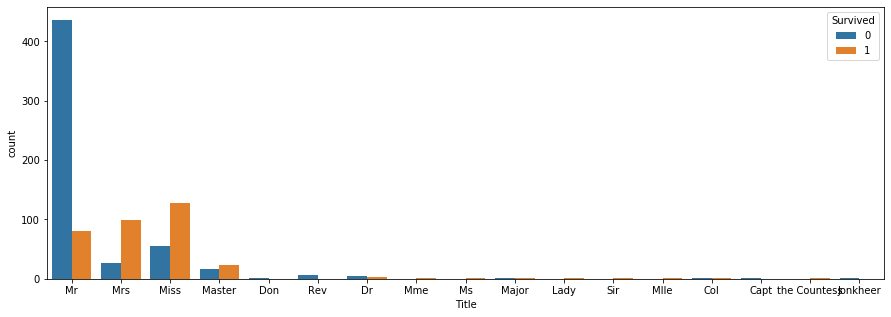

In [56]:
plt.figure(figsize = (15,5))
sns.countplot(data = train, x='Title', hue = 'Survived')

In [57]:
#map
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [58]:
#key
title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 
         'Mme', 'Lady', 'Ms', 'Mlle', 
         'Don', 'Dr', 'Major', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer']

In [59]:
#value
convert_title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev']+['Girls']*4+['Other']*8

In [60]:
convert_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Girls',
 'Girls',
 'Girls',
 'Girls',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [61]:
title_dict = dict(zip(title, convert_title)) #딕셔너리 형태로 변환
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Mme': 'Girls',
 'Lady': 'Girls',
 'Ms': 'Girls',
 'Mlle': 'Girls',
 'Don': 'Other',
 'Dr': 'Other',
 'Major': 'Other',
 'Sir': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other'}

In [62]:
#map
train['Title'] = train['Title'].map(title_dict)
train['Title']

PassengerId
1          Mr
2         Mrs
3        Miss
4         Mrs
5          Mr
6          Mr
7          Mr
8      Master
9         Mrs
10        Mrs
11       Miss
12       Miss
13         Mr
14         Mr
15       Miss
16        Mrs
17     Master
18         Mr
19        Mrs
20        Mrs
21         Mr
22         Mr
23       Miss
24         Mr
25       Miss
26        Mrs
27         Mr
28         Mr
29       Miss
30         Mr
31      Other
32        Mrs
33       Miss
34         Mr
35         Mr
36         Mr
37         Mr
38         Mr
39       Miss
40       Miss
41        Mrs
42        Mrs
43         Mr
44       Miss
45       Miss
46         Mr
47         Mr
48       Miss
49         Mr
50        Mrs
51     Master
52         Mr
53        Mrs
54        Mrs
55         Mr
56         Mr
57       Miss
58         Mr
59       Miss
60     Master
61         Mr
62       Miss
63         Mr
64     Master
65         Mr
66     Master
67        Mrs
68         Mr
69       Miss
70         Mr
71      

In [63]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev', 'Girls'],
      dtype=object)

In [64]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [65]:
title_dict['Dona'] = 'Other'
title_dict['Dona']

'Other'

In [66]:
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Mme': 'Girls',
 'Lady': 'Girls',
 'Ms': 'Girls',
 'Mlle': 'Girls',
 'Don': 'Other',
 'Dr': 'Other',
 'Major': 'Other',
 'Sir': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other',
 'Dona': 'Other'}

In [67]:
test['Title'] = test['Title'].map(title_dict)
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Girls', 'Other', 'Rev'],
      dtype=object)

In [68]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,FamilySize,FamilyGroup,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,M,2,Small,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,2,Small,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,M,1,Alone,Miss


In [69]:
#Name, Ticket, FamilySize 삭제
train.drop(['Name', 'Ticket', 'FamilySize'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'FamilySize'], axis=1, inplace=True)

In [70]:
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilyGroup,Title
PassengerId,,,,,,,,,,,
1,0,3,male,22,1,0,7.2500,S,M,Small,Mr
2,1,1,female,38,1,0,71.2833,C,C,Small,Mrs
3,1,3,female,26,0,0,7.9250,S,M,Alone,Miss


In [71]:
test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilyGroup,Title
PassengerId,,,,,,,,,,
892,3,male,34,0,0,7.8292,Q,M,Alone,Mr
893,3,female,47,1,0,7.0000,S,M,Small,Mrs
894,2,male,62,0,0,9.6875,Q,M,Alone,Mr


In [72]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


### 문제와 답 분리

In [73]:
X_train = train.drop('Survived', axis = 1) #훈련데이터 문제
y_train = train['Survived'] #훈련 데이터 정답
X_test = test #테스트 데이터 문제

In [74]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(891, 10)
(891,)
(418, 10)


In [75]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck',
       'FamilyGroup', 'Title'],
      dtype='object')

In [76]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilyGroup,Title
PassengerId,,,,,,,,,,
1,3,male,22,1,0,7.2500,S,M,Small,Mr
2,1,female,38,1,0,71.2833,C,C,Small,Mrs
3,3,female,26,0,0,7.9250,S,M,Alone,Miss
4,1,female,35,1,0,53.1000,S,C,Small,Mrs
5,3,male,35,0,0,8.0500,S,M,Alone,Mr
6,3,male,26,0,0,8.4583,Q,M,Alone,Mr
7,1,male,54,0,0,51.8625,S,E,Alone,Mr
8,3,male,2,3,1,21.0750,S,M,Large,Master
9,3,female,27,0,2,11.1333,S,M,Small,Mrs


In [77]:
#
cat_feature = ['Sex', 'Embarked', 'Deck', 'FamilyGroup', 'Title']

In [78]:
#pd.get_dummies('특성', prefix = 'Sex')
pd.get_dummies(X_train['Sex'], prefix='Sex') #앞에 prefix라는 글자를 붙여준다.

,Sex_female,Sex_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
6,0,1
7,0,1
8,0,1
9,1,0


In [79]:
for cat_name in cat_feature:
    one_hot = pd.get_dummies(X_train[cat_name], prefix=cat_name) #원핫인코딩
    X_train = pd.concat([X_train, one_hot], axis=1) #원핫인코딩 변환된거 기존 df에 적용, 병합한다.
    X_train.drop(cat_name, axis=1, inplace = True) #기존 특성 삭제 

In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             891 non-null    int64  
 1   Age                891 non-null    int64  
 2   SibSp              891 non-null    int64  
 3   Parch              891 non-null    int64  
 4   Fare               891 non-null    float64
 5   Sex_female         891 non-null    uint8  
 6   Sex_male           891 non-null    uint8  
 7   Embarked_C         891 non-null    uint8  
 8   Embarked_Q         891 non-null    uint8  
 9   Embarked_S         891 non-null    uint8  
 10  Deck_A             891 non-null    uint8  
 11  Deck_B             891 non-null    uint8  
 12  Deck_C             891 non-null    uint8  
 13  Deck_D             891 non-null    uint8  
 14  Deck_E             891 non-null    uint8  
 15  Deck_F             891 non-null    uint8  
 16  Deck_G             891 non

In [81]:
pd.get_dummies(X_test['Sex'], prefix='Sex')

,Sex_female,Sex_male
PassengerId,,
892,0,1
893,1,0
894,0,1
895,0,1
896,1,0
897,0,1
898,1,0
899,0,1
900,1,0


In [82]:
for cat_name in cat_feature:
    one_hot = pd.get_dummies(X_test[cat_name], prefix=cat_name) #원핫인코딩
    X_test = pd.concat([X_test, one_hot], axis=1) #원핫인코딩 변환된거 기존 df에 적용, 병합한다.
    X_test.drop(cat_name, axis=1, inplace = True) #기존 특성 삭제 

In [83]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             418 non-null    int64  
 1   Age                418 non-null    int64  
 2   SibSp              418 non-null    int64  
 3   Parch              418 non-null    int64  
 4   Fare               418 non-null    float64
 5   Sex_female         418 non-null    uint8  
 6   Sex_male           418 non-null    uint8  
 7   Embarked_C         418 non-null    uint8  
 8   Embarked_Q         418 non-null    uint8  
 9   Embarked_S         418 non-null    uint8  
 10  Deck_A             418 non-null    uint8  
 11  Deck_B             418 non-null    uint8  
 12  Deck_C             418 non-null    uint8  
 13  Deck_D             418 non-null    uint8  
 14  Deck_E             418 non-null    uint8  
 15  Deck_F             418 non-null    uint8  
 16  Deck_G             418 

In [84]:
print(X_train.shape)
print(X_test.shape)

(891, 29)
(418, 28)


In [85]:
#정렬, 중복 제거
set(X_train.columns) - set(X_test.columns)

{'Deck_T'}

In [86]:
X_test['Deck_T'] = 0

In [87]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             418 non-null    int64  
 1   Age                418 non-null    int64  
 2   SibSp              418 non-null    int64  
 3   Parch              418 non-null    int64  
 4   Fare               418 non-null    float64
 5   Sex_female         418 non-null    uint8  
 6   Sex_male           418 non-null    uint8  
 7   Embarked_C         418 non-null    uint8  
 8   Embarked_Q         418 non-null    uint8  
 9   Embarked_S         418 non-null    uint8  
 10  Deck_A             418 non-null    uint8  
 11  Deck_B             418 non-null    uint8  
 12  Deck_C             418 non-null    uint8  
 13  Deck_D             418 non-null    uint8  
 14  Deck_E             418 non-null    uint8  
 15  Deck_F             418 non-null    uint8  
 16  Deck_G             418 

In [88]:
X_train.sort_index(axis=1, inplace = True)
X_test.sort_index(axis=1, inplace = True)

In [89]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                891 non-null    int64  
 1   Deck_A             891 non-null    uint8  
 2   Deck_B             891 non-null    uint8  
 3   Deck_C             891 non-null    uint8  
 4   Deck_D             891 non-null    uint8  
 5   Deck_E             891 non-null    uint8  
 6   Deck_F             891 non-null    uint8  
 7   Deck_G             891 non-null    uint8  
 8   Deck_M             891 non-null    uint8  
 9   Deck_T             891 non-null    uint8  
 10  Embarked_C         891 non-null    uint8  
 11  Embarked_Q         891 non-null    uint8  
 12  Embarked_S         891 non-null    uint8  
 13  FamilyGroup_Alone  891 non-null    uint8  
 14  FamilyGroup_Large  891 non-null    uint8  
 15  FamilyGroup_Small  891 non-null    uint8  
 16  Fare               891 non

### 5. 모델 선택 및 학습

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [92]:
pre = tree_model.predict(X_test)

In [93]:
gender = pd.read_csv('data/gender_submission.csv')
gender['Survived'] = pre
gender.to_csv('KJW_submission.csv', index = False)

In [94]:
# 하이퍼 파라미터 조정 / 모델 재생성
# 하이퍼 파라미터 값을 찾아보자 - 

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train,y_train, random_state=1)

In [98]:
train_score_list = []
test_score_list = []
for max_d in range(1,50): #for문 반복하는 동안 1~50까지가 들어간다
    model = DecisionTreeClassifier(max_depth=max_d) #모델 선택
    model.fit(X_train2, y_train2)
    
    #train 점수 누적
    train_score_list.append(model.score(X_train2, y_train2)) #train_score_list에 추가
    #test 점수 누적
    test_score_list.append(model.score(X_val, y_val))

In [99]:
train_score_list

[0.7904191616766467,
 0.8008982035928144,
 0.8368263473053892,
 0.8622754491017964,
 0.8697604790419161,
 0.8982035928143712,
 0.9221556886227545,
 0.9326347305389222,
 0.9491017964071856,
 0.9655688622754491,
 0.9670658682634731,
 0.9745508982035929,
 0.9775449101796407,
 0.9865269461077845,
 0.9880239520958084,
 0.9880239520958084,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640718563,
 0.9910179640

In [100]:
test_score_list

[0.757847533632287,
 0.7533632286995515,
 0.8116591928251121,
 0.7847533632286996,
 0.7982062780269058,
 0.757847533632287,
 0.7623318385650224,
 0.7533632286995515,
 0.7533632286995515,
 0.757847533632287,
 0.7623318385650224,
 0.7668161434977578,
 0.7623318385650224,
 0.7488789237668162,
 0.726457399103139,
 0.7443946188340808,
 0.7399103139013453,
 0.7488789237668162,
 0.7354260089686099,
 0.7354260089686099,
 0.7443946188340808,
 0.7354260089686099,
 0.7354260089686099,
 0.7309417040358744,
 0.7354260089686099,
 0.7354260089686099,
 0.726457399103139,
 0.7488789237668162,
 0.7309417040358744,
 0.7443946188340808,
 0.7399103139013453,
 0.726457399103139,
 0.7354260089686099,
 0.7399103139013453,
 0.7354260089686099,
 0.7443946188340808,
 0.7399103139013453,
 0.7399103139013453,
 0.7309417040358744,
 0.7443946188340808,
 0.7309417040358744,
 0.7354260089686099,
 0.7399103139013453,
 0.7399103139013453,
 0.7399103139013453,
 0.726457399103139,
 0.7219730941704036,
 0.7309417040358744,

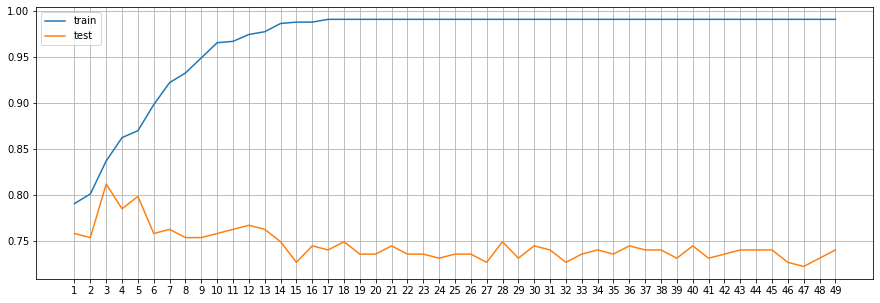

In [105]:
plt.figure(figsize=(15,5))
plt.plot(range(1,50), train_score_list, label='train')
plt.plot(range(1,50), test_score_list, label='test')
plt.legend()
plt.xticks(range(1,50))
plt.grid()
plt.show()

# train에 대해서는 높고, test에 대해서는 낮다 = 과대적합

In [106]:
#

In [107]:
model2 = DecisionTreeClassifier(max_depth=3)

In [108]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [110]:
model2.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [111]:
pre2 = model2.predict(X_test)

In [117]:
#gender_submission 파일 불러와서
#Survived 컬럼에 대입 후 파일 저장
gender = pd.read_csv('data/gender_submission.csv')
gender['Survived'] = pre2
gender.to_csv('KJW_submission.csv', index = False)

## 검증데이터 이용 - 모델 일반화 확인

In [118]:
from sklearn.model_selection import cross_val_score

In [120]:
tree_model = DecisionTreeClassifier(max_depth=3)
result = cross_val_score(tree_model, X_train, y_train, cv = 5)
result.mean()

0.8159249262444291

In [121]:
result.mean()

0.8159249262444291

In [128]:
train_val_score=[]
for max_d in range(1,50):
    model = DecisionTreeClassifier(max_depth = max_d)
    result2 = cross_val_score(model, X_train, y_train, cv = 5)
    #검증데이터 정확도 평균
    train_val_score.append(result2.mean())

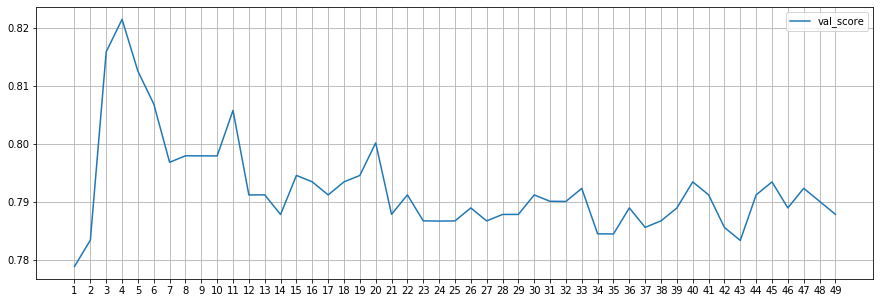

In [129]:
plt.figure(figsize=(15,5))
plt.plot(range(1,50), train_val_score, label='val_score')
plt.legend()
plt.xticks(range(1,50))
plt.grid()
plt.show()